In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use("fivethirtyeight")

In [166]:
def koch(pts,n): #Defino el conj de Koch, pts es cuantos puntos tiene en cada recta inicialmente, n es la cantidad de iteraciones
    k=np.array([[i/pts,0] for i in range(pts)])
    mat1=np.array([[np.cos(np.pi/3),-np.sin(np.pi/3)],[np.sin(np.pi/3),np.cos(np.pi/3)]]) #defino las matrices de rotacion
    mat2=np.array([[np.cos(np.pi/3),np.sin(np.pi/3)],[-np.sin(np.pi/3),np.cos(np.pi/3)]]) 
    for i in range(n):
        k_rot1=np.array([np.matmul(mat1,r) for r in k]) #creo copias del conj rotado
        k_rot2=np.array([np.matmul(mat2,r) for r in k])
        Ko=np.concatenate((k/3,k_rot1/3+np.array([[1/3,0] for _ in range(len(k))]),k_rot2/3+np.array([[1/2,np.sqrt(3)/2/3] for _ in range(len(k))]),k/3+np.array([[2/3,0] for _ in range(len(k))])))
        #esto es basicamente K=(1/3K)u(1/3R1K+1/3)u(1/3R2K+1/2)u(1/3K+2/3)
        k=np.array([r for r in Ko]) #para volver a iterar
    return Ko

In [167]:
Ko=koch(6,6)
print(len(Ko)) #cantidad de puntos

24576


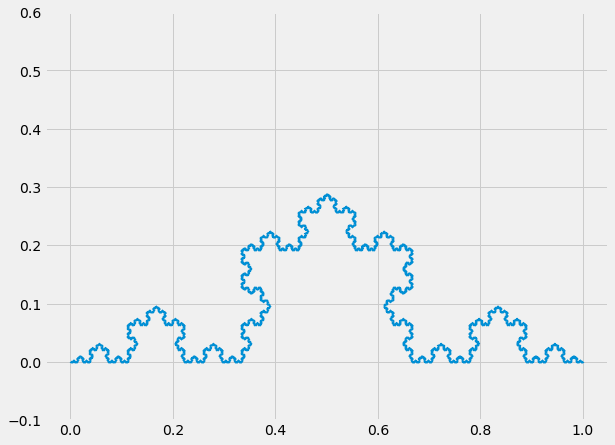

In [194]:
fig=plt.figure(figsize=(9,7)) #plot
plt.scatter(Ko.T[0],Ko.T[1],s=0.5)
plt.ylim([-0.1,0.6])
plt.show()

In [183]:
def S(k,A): #definamos la entropía para un conjunto A bidimensional
    Ax=A[0]
    Ay=A[1]
    d=2**(-k) #delta es la longitud del conjunto dividida 2^k
    Count=[np.sum((Ax>i*d)*(Ax<(i+1)*d)*(Ay>j*d)*(Ay<(j+1)*d)) for i in range(2**k) for j in range(2**k)] #creo un vector de conteos
    #básicamente en la comp. j de este vector está la cantidad de elementos entre j*d y (j+1)*d
    Probs=np.array(Count)/len(Ax) #la probabilidad va dividida por la cant total de puntos.
    Probs_nozeros=Probs[np.where(Probs!=0)] #es importante sacarse los ceros de encima para evaluar logaritmos
    return -np.sum(Probs_nozeros*np.log2(Probs_nozeros)) #finalmente devuelvo la entropía

In [184]:
S(3,[Ko.T[0],Ko.T[1]]) #por ejemplo

3.5718716173210954

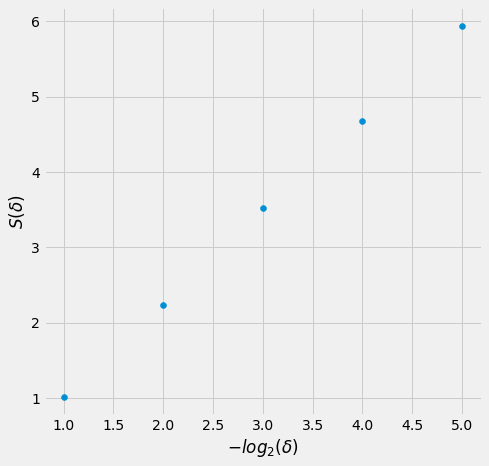

In [201]:
#hagamos un vector con todas las entropías
Entropias=[S(i,[Ko.T[0],Ko.T[1]]) for i in range(1,6)]
fig=plt.figure(figsize=(7,7))
plt.scatter(range(1,6),Entropias) #plot log delta vs S
plt.xlabel(r'$-log_2(\delta)$')
plt.ylabel(r'$S(\delta)$')
plt.show()

In [202]:
#Veamos la pendiente
pendiente,ordenada,_,_,error=linregress(range(1,6),Entropias)
print("pendiente obtenida:",pendiente,"mas menos",error)
print("exacta:",np.log(4)/np.log(3))

pendiente obtenida: 1.228865777548503 mas menos 0.010045306509624362
exacta: 1.2618595071429148


In [197]:
def C(k,A): #definamos la correlacion a dist 2^-k conjunto A bidimensional
    Ax=A[0]
    Ay=A[1]
    d=2**(-k) #delta
    Dif_x=[x1-x2 for x1 in Ax for x2 in Ax] #creo vectores de componentes x e y
    Dif_y=[y1-y2 for y1 in Ay for y2 in Ay]
    Distancias=0 #contador de distancias menores que delta
    for i in range(len(Dif_x)):
        if (Dif_x[i]!=0 or Dif_y[i]!=0): #necesito que al menos alguna comp sea no nula, si no estoy viendo la dist. de un punto consigo mismo
            if (np.sqrt(Dif_x[i]*Dif_x[i]+Dif_y[i]*Dif_y[i])<d): #si la dist es menor que delta
                Distancias=Distancias+1 #lo cuento
    
    return Distancias/(len(Ax)*(len(Ax)-1)) #divido por el total que es N(N-1)

In [199]:
Ko=koch(4,5)
print(len(Ko)) #voy a necesitar menos puntos por que es mucho computo


4096


In [200]:
C(3,[Ko.T[0],Ko.T[1]]) #por ejemplo

0.18312585851648353

In [210]:
Correlaciones=np.array([C(i,[Ko.T[0],Ko.T[1]]) for i in range(3,6)])
#tarda mucho

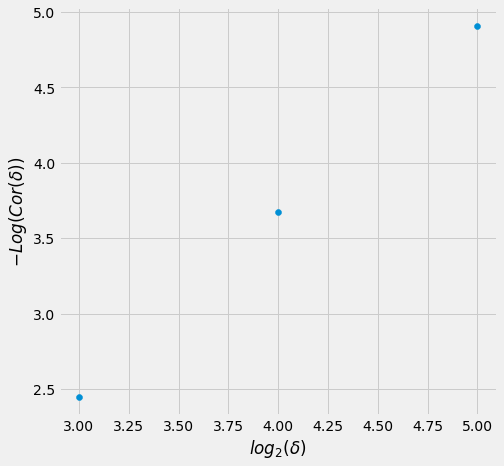

In [211]:
fig=plt.figure(figsize=(7,7))
plt.scatter(range(3,6),-np.log2(Correlaciones)) #plot log delta vs S
plt.xlabel(r'$log_2(\delta)$')
plt.ylabel(r'$-Log(Cor(\delta))$')
plt.show()

In [212]:
#Veamos la pendiente
pendiente,ordenada,_,_,error=linregress(range(3,6),-np.log2(Correlaciones))
print("pendiente obtenida:",pendiente,"mas menos",error)
print("exacta:",np.log(4)/np.log(3))

pendiente obtenida: 1.2303041006125464 mas menos 0.0021811233300010908
exacta: 1.2618595071429148
